In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv('bbc_news_dataset.csv')
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [31]:
df.shape

(1490, 3)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB


In [33]:
X= df['Text']
y=df['Category']

In [34]:
category_names=df['Category'].unique()
print(category_names)

['business' 'tech' 'politics' 'sport' 'entertainment']


In [35]:
df['Category'].value_counts()

Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64

Text(0.5, 1.0, 'Categories Distribution')

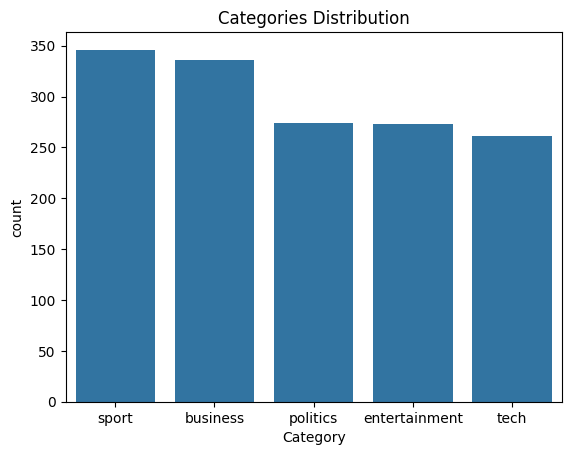

In [36]:
sns.barplot(df['Category'].value_counts())
plt.title('Categories Distribution')

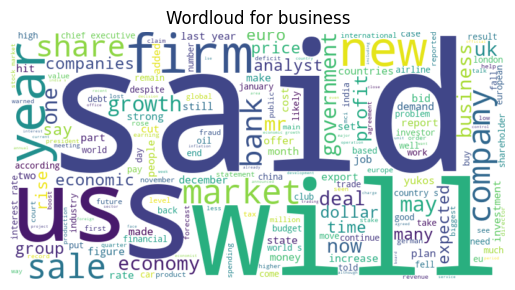

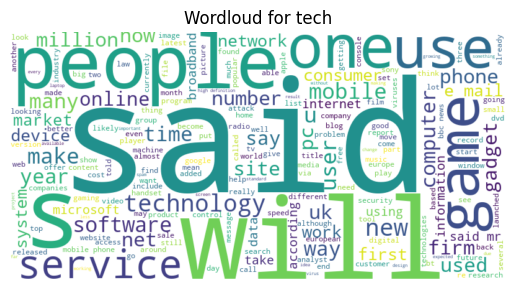

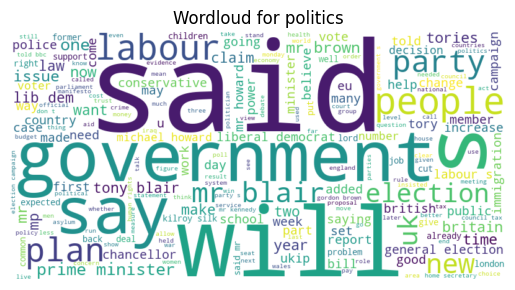

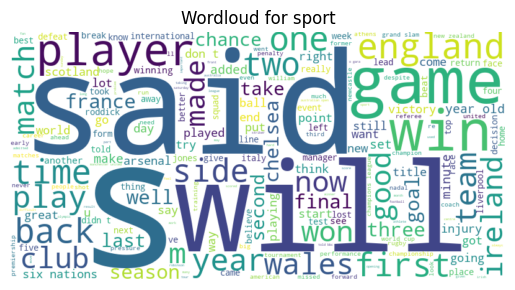

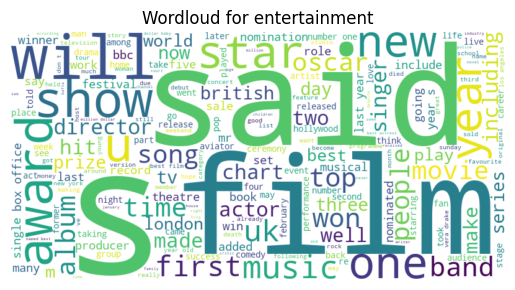

In [37]:
from wordcloud import WordCloud
for category in category_names:
    text = " ".join(df[df['Category']==category]['Text'].values)
    wordcloud = WordCloud(
        width= 800,height = 400,background_color='white'
    ).generate(text)
    plt.Figure(figsize=(8,4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Wordloud for {category}')
    plt.axis('off')
    plt.savefig(f'Word Cloud for {category}.png')
    plt.show()
    

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,y_train.shape

((1192,), (1192,))

In [39]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [40]:
nb_model = make_pipeline(TfidfVectorizer(stop_words='english'),MultinomialNB())
nb_model.fit(X_train,y_train)
y_pred = nb_model.predict(X_test)
accuracy_score(y_test,y_pred)


0.9563758389261745

In [41]:
print(classification_report(y_test,y_pred))

               precision    recall  f1-score   support

     business       0.94      0.97      0.95        75
entertainment       1.00      0.96      0.98        46
     politics       0.91      0.95      0.93        56
        sport       0.97      1.00      0.98        63
         tech       0.98      0.90      0.94        58

     accuracy                           0.96       298
    macro avg       0.96      0.95      0.96       298
 weighted avg       0.96      0.96      0.96       298



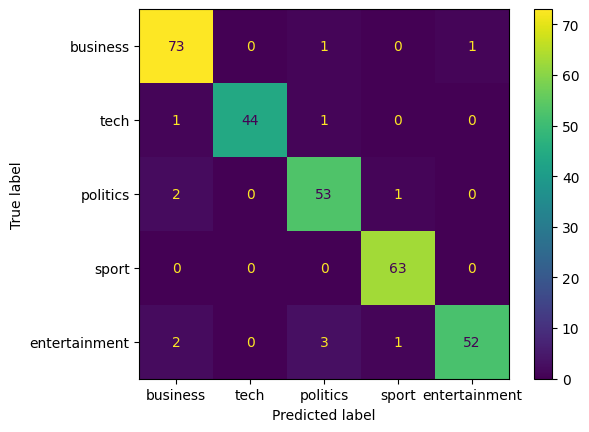

In [42]:
cm = confusion_matrix(y_test,y_pred)
cm_plot = ConfusionMatrixDisplay(confusion_matrix= cm,
                                 display_labels= df['Category'].unique())
cm_plot.plot()
plt.savefig('cm.png')
plt.show()

In [ ]:
text = ['Manchester United won against Chelsea by 3-0.',
         '']
prediction= nb_model.predict(text)
for text, prediction in zip(text,prediction):
    print(f'Text: {text}\nPredicted Category: {prediction}')

Text: Manchester United won against Chelsea by 3-0.
Predicted Category: sport


In [44]:
import joblib
joblib.dump(nb_model,'Naive_Bayes_model.joblib')
print('Success')



Success
